# MLET TechChallenge Fase 3 - Modelo de previsões do Campeonato Brasileiro

## 1 - Apresentação

**Objetivo**

Realizar a previsão de um time ser o vencedor de determinado confronto no Campeonato Brasileiro 2024, baseado no dataset com uma série histórica de 2004 em diante.

**Técnica**
Aprendizagem supervisionada, mais precisamente a técnicas de Classificação.



## 2 - Carregando os dados




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

Carregamento dos dados

In [3]:
dados = pd.read_csv('/content/sample_data/mundo_transfermarkt_competicoes_brasileirao_serie_a_1.csv')
dados.head()

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2004,2004-04-22,1,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Flamengo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,2004-04-29,3,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Corinthians,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,2004-07-21,17,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Paraná,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,2004-07-29,19,Arena do Grêmio,NaN,NaN,NaN,Grêmio,EC Vitória,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,2004-10-03,34,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Criciúma EC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3 - Apresentação de dados inicial

Visualizar quantidade de linhas x colunas:

In [4]:
dados.shape

(8349, 35)

Visualização da quantidade dos valor dos dados por coluna:

In [5]:
for coluna in dados.columns:
    print('========='*30)
    print(dados[coluna].value_counts())

ano_campeonato
2004    456
2003    456
2005    418
2008    380
2017    380
2018    380
2016    380
2019    380
2020    380
2007    380
2021    380
2009    380
2015    380
2010    380
2022    380
2013    380
2011    380
2023    380
2012    380
2014    380
2006    380
2024    179
Name: count, dtype: int64
data
2004-07-14    12
2004-07-21    12
2008-12-07    10
2015-12-06    10
2007-07-04    10
              ..
2021-06-21     1
2019-08-12     1
2011-07-14     1
2019-09-23     1
2019-07-27     1
Name: count, Length: 2071, dtype: int64
rodada
1     225
18    225
12    225
15    225
14    225
7     225
20    225
4     225
3     225
21    225
9     225
2     225
13    225
8     225
17    223
6     223
16    223
5     223
19    221
22    216
35    215
29    215
10    215
32    215
34    215
11    215
26    215
30    215
31    215
33    215
28    215
24    215
38    215
23    215
36    215
37    215
25    215
27    215
Name: count, dtype: int64
estadio
Estádio Jornalista Mário Filho            

Visualização das informações das colunas do Dataset:

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8349 entries, 0 to 8348
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  8349 non-null   int64  
 1   data                            8349 non-null   object 
 2   rodada                          8349 non-null   int64  
 3   estadio                         8338 non-null   object 
 4   arbitro                         6639 non-null   object 
 5   publico                         6638 non-null   float64
 6   publico_max                     4079 non-null   float64
 7   time_mandante                   8349 non-null   object 
 8   time_visitante                  8349 non-null   object 
 9   tecnico_mandante                6195 non-null   object 
 10  tecnico_visitante               6195 non-null   object 
 11  colocacao_mandante              6639 non-null   float64
 12  colocacao_visitante             66

## 4 - Pré-Processamento de dados

### Adicionando o resultado dos jogos

Adicionando a variável "**res**" de acordo com os valores de gols mandante e visitante:


*   Valor igual a "1" quando o vencedor do confronto é o time mandante
*   Valor igual a "2" quando o vencedor do confronto é o time visitante
*   Valor igual a "0" quando para empate

In [7]:
dados['res'] = dados.apply(
    lambda row: 1 if row['gols_mandante'] > row['gols_visitante'] else
                (2 if row['gols_mandante'] < row['gols_visitante'] else 0),
    axis=1
)

dados.head()

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante,res
0,2004,2004-04-22,1,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Flamengo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2004,2004-04-29,3,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Corinthians,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2004,2004-07-21,17,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Paraná,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2004,2004-07-29,19,Arena do Grêmio,NaN,NaN,NaN,Grêmio,EC Vitória,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2004,2004-10-03,34,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Criciúma EC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### Explorando os dados

In [8]:
total_jogos = dados.shape[0]
cols = dados.shape[1] -1 #Retirando a coluna Resultado

mandante_vencedor = len(dados[dados.res==1])
visitante_vencedor = len(dados[dados.res==2])
empate = len(dados[dados.res==0])
val=[mandante_vencedor,visitante_vencedor,empate]

per_jogos_ganhos_casa = (float(mandante_vencedor)/(total_jogos)) *100

print ('Total de jogos: ', total_jogos)
print ('Total de colunas: ', cols)
print ('Total de jogos ganhos em casa: ', mandante_vencedor)
print ('Total de jogos ganhos pelo visitante: ', visitante_vencedor)
print ('Total de jogos empatados: ', empate)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( per_jogos_ganhos_casa ))

Total de jogos:  8349
Total de colunas:  35
Total de jogos ganhos em casa:  4127
Total de jogos ganhos pelo visitante:  2000
Total de jogos empatados:  2222
Percentual de jogos ganhos em casa: 49.43%


### Visualização dos dados por tipo resultado


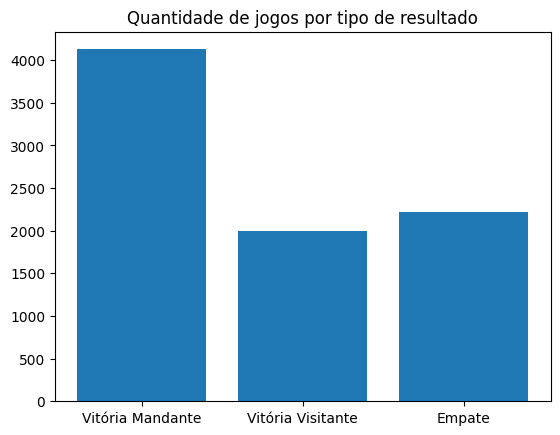

In [9]:
x = np.arange(3)
plt.bar(x, val)
plt.xticks(x, ('Vitória Mandante', 'Vitória Visitante', 'Empate'))
plt.title('Quantidade de jogos por tipo de resultado')
plt.show()

*Percebe-se que o mantande possui quase 50% das vitórias

### Configurando novas variáveis e ajustando modelo

Adicionando o ID do jogo

In [10]:
dados["id_jogo"] = dados.index

Adicionando o ID dos times mandantes e visitantes

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder_mandante = LabelEncoder()
label_encoder_visitante = LabelEncoder()
dados['time_mandante_id'] = label_encoder_mandante.fit_transform(dados['time_mandante'])
dados['time_visitante_id'] = label_encoder_visitante.fit_transform(dados['time_visitante'])

dados.head()

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante,res,id_jogo,time_mandante_id,time_visitante_id
0,2004,2004-04-22,1,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Flamengo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,26,21
1,2004,2004-04-29,3,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Corinthians,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,26,13
2,2004,2004-07-21,17,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Paraná,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2,26,34
3,2004,2004-07-29,19,Arena do Grêmio,NaN,NaN,NaN,Grêmio,EC Vitória,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3,26,19
4,2004,2004-10-03,34,Arena do Grêmio,NaN,NaN,NaN,Grêmio,Criciúma EC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,4,26,15


Exportando os dados dos Times com os ID's

In [12]:
tabela = dados[["time_mandante", "time_mandante_id"]]
tabela = tabela.drop_duplicates().sort_values("time_mandante_id")
tabela.to_excel('tabela_times.xlsx', index=False)



Removendo variáveis não utilizadas

In [13]:

df = dados.drop(['data','estadio','arbitro','publico','publico_max','tecnico_mandante','tecnico_visitante', 'time_mandante', 'time_visitante'], axis = 1)

display(df.head())

,ano_campeonato,rodada,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,gols_mandante,gols_visitante,...,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante,res,id_jogo,time_mandante_id,time_visitante_id
0,2004,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,26,21
1,2004,3,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,26,13
2,2004,17,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2,26,34
3,2004,19,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3,26,19
4,2004,34,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,4,26,15


### Dados Nulos

Quantidade de linhas nulas de acordo com a coluna

In [14]:
df.isnull().sum()

,0
ano_campeonato,0
rodada,0
colocacao_mandante,1710
colocacao_visitante,1710
valor_equipe_titular_mandante,2098
valor_equipe_titular_visitante,2098
idade_media_titular_mandante,2100
idade_media_titular_visitante,2100
gols_mandante,5
gols_visitante,5


Determinando a quantidade de dados nulos percentualmente em cada coluna:

In [15]:
# Calculando os valores ausentes
nulos = df.isnull().sum()
# Calculando a porcentagem de valores ausentes para cada coluna
nulos_per = (nulos / len(df)) * 100
# Criando um resumo dos valores ausentes
nulos_resumo = pd.DataFrame({
    'Colunas': df.columns,
    'Nulos': nulos,
    'Nulos Percentagem (%)': nulos_per
}).sort_values(by='Nulos Percentagem (%)', ascending=False)

# Exibindo os primeiros registros do resumo
nulos_resumo.head()

,Colunas,Nulos,Nulos Percentagem (%)
faltas_visitante,faltas_visitante,6366,76.248653
escanteios_mandante,escanteios_mandante,6366,76.248653
chutes_fora_mandante,chutes_fora_mandante,6366,76.248653
chutes_visitante,chutes_visitante,6366,76.248653
chutes_mandante,chutes_mandante,6366,76.248653


Remoção de colunas com mais de 50% de valores nulos e colunas que não serão utilizadas para testar e treinar o modelo:

In [16]:
remove = nulos_resumo[nulos_resumo['Nulos Percentagem (%)'] > 50]['Colunas'].tolist()
novos_dados = df.drop(columns=remove)

for column in novos_dados.columns:
    if novos_dados[column].dtype == 'object':
        novos_dados[column] = novos_dados[column].fillna(novos_dados[column].mode()[0])
    else:
        novos_dados[column] = novos_dados[column].fillna(novos_dados[column].mean())
novos_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8349 entries, 0 to 8348
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  8349 non-null   int64  
 1   rodada                          8349 non-null   int64  
 2   colocacao_mandante              8349 non-null   float64
 3   colocacao_visitante             8349 non-null   float64
 4   valor_equipe_titular_mandante   8349 non-null   float64
 5   valor_equipe_titular_visitante  8349 non-null   float64
 6   idade_media_titular_mandante    8349 non-null   float64
 7   idade_media_titular_visitante   8349 non-null   float64
 8   gols_mandante                   8349 non-null   float64
 9   gols_visitante                  8349 non-null   float64
 10  gols_1_tempo_mandante           8349 non-null   float64
 11  gols_1_tempo_visitante          8349 non-null   float64
 12  res                             83

Separando as features do target no dataset

In [17]:
features = novos_dados.drop(['res'], axis = 1)
label = novos_dados['res']
print('Features')
print (features.head())
print ('=========')
print ('Target')
print (label.head())

Features
   ano_campeonato  rodada  colocacao_mandante  colocacao_visitante  \
0            2004       1           10.622835            10.379123   
1            2004       3           10.622835            10.379123   
2            2004      17           10.622835            10.379123   
3            2004      19           10.622835            10.379123   
4            2004      34           10.622835            10.379123   

   valor_equipe_titular_mandante  valor_equipe_titular_visitante  \
0                   1.642289e+07                    1.601536e+07   
1                   1.642289e+07                    1.601536e+07   
2                   1.642289e+07                    1.601536e+07   
3                   1.642289e+07                    1.601536e+07   
4                   1.642289e+07                    1.601536e+07   

   idade_media_titular_mandante  idade_media_titular_visitante  gols_mandante  \
0                     27.295903                      27.194351            0.0   

### Escolhendo melhores parametros com Kbest

In [18]:
features.columns

Index(['ano_campeonato', 'rodada', 'colocacao_mandante', 'colocacao_visitante',
       'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante',
       'idade_media_titular_mandante', 'idade_media_titular_visitante',
       'gols_mandante', 'gols_visitante', 'gols_1_tempo_mandante',
       'gols_1_tempo_visitante', 'id_jogo', 'time_mandante_id',
       'time_visitante_id'],
      dtype='object')

In [19]:
#Escolhendo as melhores features com Kbest

features_list = ('ano_campeonato', 'rodada', 'colocacao_mandante', 'colocacao_visitante',
       'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante',
       'idade_media_titular_mandante', 'idade_media_titular_visitante',
       'gols_mandante', 'gols_visitante', 'gols_1_tempo_mandante',
       'gols_1_tempo_visitante', 'id_jogo', 'time_mandante_id',
       'time_visitante_id')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, label)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))
k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores parametros:")
print (k_best_features_final)


Melhores parametros:
{'gols_visitante': 2626.8957505469884, 'gols_1_tempo_mandante': 2571.590609669343, 'id_jogo': 589.7815207125288, 'gols_1_tempo_visitante': 582.8247052837213, 'colocacao_visitante': 107.47912545533949, 'valor_equipe_titular_mandante': 78.00013114644752, 'idade_media_titular_mandante': 77.69086201229624, 'valor_equipe_titular_visitante': 47.20357448732466, 'time_visitante_id': 6.744176476107607, 'rodada': 5.036846578829135, 'gols_mandante': 3.3673654354791447, 'colocacao_mandante': 2.4066401528333174, 'time_mandante_id': 1.3553679666192007, 'idade_media_titular_visitante': 0.020236029762830208}


Escolhendo as variaveis para treinar e testar o modelo de acordo com o Kbest

In [20]:
features = features.drop(['gols_visitante', 'id_jogo',  'idade_media_titular_visitante', 'idade_media_titular_mandante', 'gols_1_tempo_mandante',  'gols_1_tempo_visitante',  'rodada', 'gols_mandante'], axis = 1)
print('Features selecionadas')
print (features.head())
print ('=========')
print ('Saidas')
print (label.head())



Features selecionadas
   ano_campeonato  colocacao_mandante  colocacao_visitante  \
0            2004           10.622835            10.379123   
1            2004           10.622835            10.379123   
2            2004           10.622835            10.379123   
3            2004           10.622835            10.379123   
4            2004           10.622835            10.379123   

   valor_equipe_titular_mandante  valor_equipe_titular_visitante  \
0                   1.642289e+07                    1.601536e+07   
1                   1.642289e+07                    1.601536e+07   
2                   1.642289e+07                    1.601536e+07   
3                   1.642289e+07                    1.601536e+07   
4                   1.642289e+07                    1.601536e+07   

   time_mandante_id  time_visitante_id  
0                26                 21  
1                26                 13  
2                26                 34  
3                26             

In [21]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8349 entries, 0 to 8348
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  8349 non-null   int64  
 1   colocacao_mandante              8349 non-null   float64
 2   colocacao_visitante             8349 non-null   float64
 3   valor_equipe_titular_mandante   8349 non-null   float64
 4   valor_equipe_titular_visitante  8349 non-null   float64
 5   time_mandante_id                8349 non-null   int64  
 6   time_visitante_id               8349 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 456.7 KB


### Normalizando os dados

In [22]:
# Normalizando os dados de entrada
# Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
dados_normalizados = scaler.transform(features)
print ('Dados Normalizados: ',dados_normalizados.shape)
print (dados_normalizados)

Dados Normalizados:  (8349, 7)
[[0.04761905 0.50646499 0.49363807 ... 0.16682282 0.56521739 0.45652174]
 [0.04761905 0.50646499 0.49363807 ... 0.16682282 0.56521739 0.2826087 ]
 [0.04761905 0.50646499 0.49363807 ... 0.16682282 0.56521739 0.73913043]
 ...
 [0.14285714 0.50646499 0.49363807 ... 0.16682282 0.10869565 0.17391304]
 [0.14285714 0.50646499 0.49363807 ... 0.16682282 0.5        0.47826087]
 [0.14285714 0.50646499 0.49363807 ... 0.16682282 0.7826087  0.73913043]]


## 5 - Modelos de Classificação

Utilizaremos os modelos de Regressão Logística, K-vizinhos mais próximos (KNN), Árvores de Classificação (CART), Naive Bayes (NB), MultiLayer Perceptron (MLP), Suporte Vector Machine (SVM), XGBoosting (XGB) e Random Forest (RF).

#### Preparação do modelo

In [23]:
# Dividindo o conjunto de dados em 70% para treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(dados_normalizados, label, test_size=0.3, random_state=23)

In [24]:
print(f'Exemplos para treino: {len(y_train)}. E para teste {len(y_test)}')

Exemplos para treino: 5844. E para teste 2505


#### Regressão Logistica

In [25]:
model_LR = LogisticRegression(multi_class='multinomial',max_iter=2000)
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [26]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

lg_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred,average = 'micro')
print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 0.5812375249500998 
RMSE: 0.762389352594919
MAPE: 1317819771202624.2
Acurácia LogisticRegression:0.5025948103792415
F1 Score:0.5025948103792415


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Regressão Logistica com Hiperparametros

In [27]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)
search.fit(X_train,y_train)
best_model_lr = search.best_estimator_
pred= best_model_lr.predict(X_test)
lg_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred,average = 'macro')
print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )
print (best_model_lr)

Acurácia LogisticRegression:0.5025948103792415
F1 Score:0.3072907888048786
LogisticRegression(C=1, max_iter=1000)


#### Support Vector Classification


In [28]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred= model_svc.predict(X_test)
pred_svc = y_pred


In [29]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

svc_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='micro')
print ('Acurácia SVC:{}'.format(svc_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 0.5457085828343313 
RMSE: 0.7387209099750266
MAPE: 1269277978811804.5
Acurácia SVC:0.5069860279441117
F1 Score:0.5069860279441117


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SVC com Hiperparametros

In [30]:
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
#search = GridSearchCV(SVC(), param_grid)
#search.fit(X_train,y_train)
#best_model_SVC = search.best_estimator_
#pred= best_model_SVC.predict(X_test)
#acc = accuracy_score(y_test, pred)
#f1=f1_score(y_test,pred,average = 'micro')
#print ('F1 Score:{}'.format(f1))
#print ('Acurácia SVC:{}'.format(acc))
#print(best_model_SVC)

### Árvore de Decisão

In [31]:
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)
y_pred= model_DTC.predict(X_test)


In [32]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

dtc_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='micro')
print ('Acurácia Arvore Decisão:{}'.format(dtc_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 1.005189620758483 
RMSE: 1.0025914525660404
MAPE: 1125450445801968.6
Acurácia Arvore Decisão:0.3936127744510978
F1 Score:0.3936127744510978


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Arvore de Descisão com hiperparametros

In [33]:

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}
search = GridSearchCV(DecisionTreeClassifier(), param_grid)
search.fit(X_train,y_train)
best_model_DTC = search.best_estimator_
pred= best_model_DTC.predict(X_test)
dt_acc = accuracy_score(y_test, pred)


f1=f1_score(y_test,pred,average = 'micro')

print ('Acurácia Decision Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )

print (best_model_DTC)

Acurácia Decision Tree:0.43912175648702595
F1 Score:0.43912175648702595
DecisionTreeClassifier(max_depth=90, max_features=2, min_samples_leaf=5,
                       min_samples_split=12)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### Naive Baeys

In [34]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_pred= model_NB.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

dtc_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='micro')
print ('Acurácia SVC:{}'.format(dtc_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 0.6590818363273453 
RMSE: 0.8118385531171486
MAPE: 1423892576797378.5
Acurácia SVC:0.49660678642714573
F1 Score:0.49660678642714573


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### XGBoosting

In [36]:
model_XGB = xgb.XGBClassifier()
model_XGB.fit(X_train, y_train)
y_pred = model_XGB.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

dtc_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='micro')
print ('Acurácia XGBoosting:{}'.format(dtc_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 0.8355289421157684 
RMSE: 0.9140727225531722
MAPE: 1191970679819017.5
Acurácia XGBoosting:0.4602794411177645
F1 Score:0.4602794411177645


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Multilayer Perceptron (MLP)

In [38]:
model_MLP = MLPClassifier()
model_MLP.fit(X_train, y_train)
y_pred = model_MLP.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

dtc_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='micro')
print ('Acurácia Multilayer Perceptron:{}'.format(dtc_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 0.6363273453093813 
RMSE: 0.7977012882711054
MAPE: 1357372342780329.2
Acurácia Multilayer Perceptron:0.506187624750499
F1 Score:0.506187624750499


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Random Forest Classifier

In [40]:
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)



In [41]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse} \nRMSE: {rmse}\nMAPE: {mape}')

dtc_acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='micro')
print ('Acurácia Random Forest:{}'.format(dtc_acc))
print ('F1 Score:{}'.format(f1) )

MSE: 0.8039920159680639 
RMSE: 0.8966560187541619
MAPE: 1186577147331148.8
Acurácia Random Forest:0.4678642714570858
F1 Score:0.4678642714570858


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 6 - Avaliação

### Matrix de Confusão

Baseado no resultado da acurácia do F1 Score o algoritmo melhor sucedido para este modelo foi o MLP

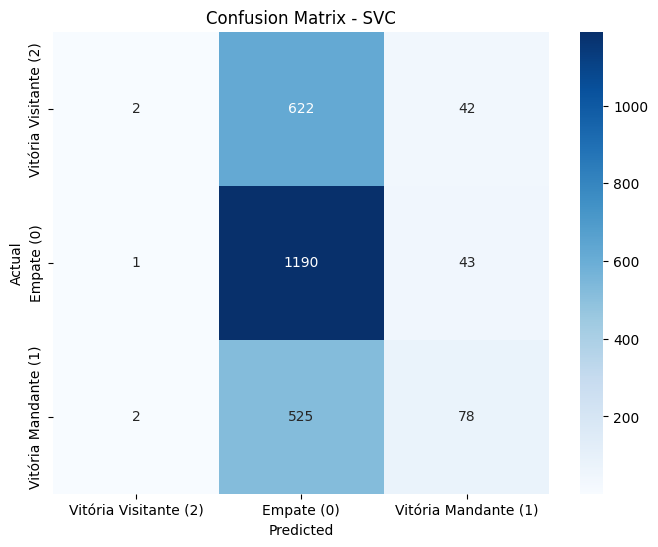

In [42]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, pred_svc)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Vitória Visitante (2)', 'Empate (0)', 'Vitória Mandante (1)'], yticklabels=['Vitória Visitante (2)', 'Empate (0)', 'Vitória Mandante (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')
plt.show()




### Relatório de Classificação

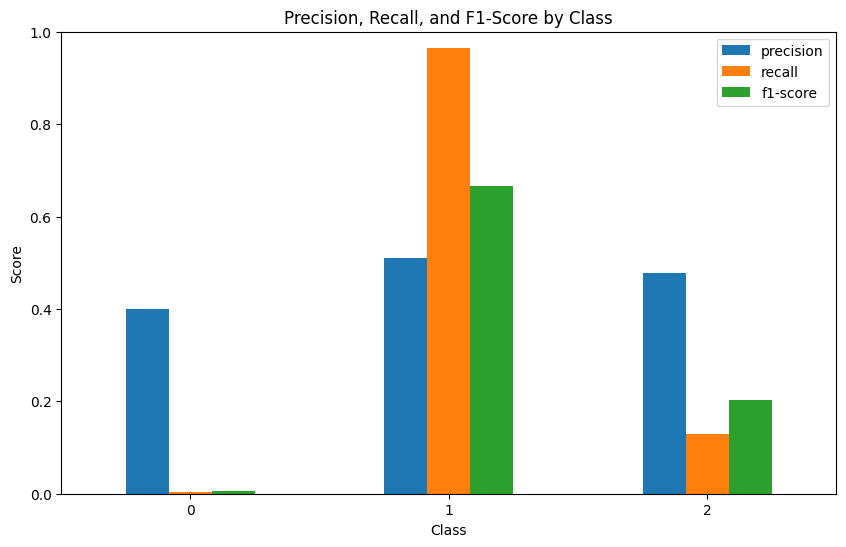

In [43]:

report_dict = classification_report(y_test, pred_svc, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().iloc[:-3, :3]

# Plotting precision, recall, and F1-score for each class
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-Score by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.show()

### Testando o modelo com os dados reais

In [44]:
features

,ano_campeonato,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,time_mandante_id,time_visitante_id
0,2004,10.622835,10.379123,1.642289e+07,1.601536e+07,26,21
1,2004,10.622835,10.379123,1.642289e+07,1.601536e+07,26,13
2,2004,10.622835,10.379123,1.642289e+07,1.601536e+07,26,34
3,2004,10.622835,10.379123,1.642289e+07,1.601536e+07,26,19
4,2004,10.622835,10.379123,1.642289e+07,1.601536e+07,26,15
...,...,...,...,...,...,...,...
8344,2006,10.622835,10.379123,1.642289e+07,1.601536e+07,28,20
8345,2006,10.622835,10.379123,1.642289e+07,1.601536e+07,46,13
8346,2006,10.622835,10.379123,1.642289e+07,1.601536e+07,5,8
8347,2006,10.622835,10.379123,1.642289e+07,1.601536e+07,23,22


In [45]:
features.to_excel('dados_normalizados.xlsx', index=False)

In [46]:
data = {
  "ano_campeonato": [2024], #ID Time Mandante
  "time_mandante_id": [21], #2 Odds de chance do time visitante ganhar
  "time_visitante_id": [26], #2 Odds de chance do time visitante ganhar
  "colocacao_mandante": [19], #ID Time Visitande
  "colocacao_visitante":[1], #1 Odds de chance do time mandante ganhar
  "valor_equipe_titular_mandante": [9913], #0 Odds de empate
  "valor_equipe_titular_visitante": [408]
}

teste = pd.DataFrame(data)
y_pred = model_svc.predict(teste)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1])

## 7 - Implementação

Gerando o arquivo .pkl

In [47]:
import pickle
with open('modelo.pkl', 'wb') as f:
    pickle.dump(model_svc, f)
